# *Regression Discontinuity Design* - RDD

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Regression Discontinuity Design
  * Aspectos Gerais do RDD
  * Caso Sharp
  * Caso Fuzzy
* Aplicação na Literatura
* Aplicação em Python
  * rdrobust
  * rdlocrand
  * Outros Pacotes

## Referências

**Principais**

* Angrist, J. D., & Pischke, J. S. (2008). Mostly harmless econometrics: An empiricist's companion. Princeton University Press.
* Avaliação Econômica de Projetos Sociais, ITAU Social, 2017.
* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Cattaneo, Idrobo and Titiunik (2024): A Practical Introduction to Regression Discontinuity Designs: Extensions. Cambridge Elements: Quantitative and Computational Methods for Social Science, Cambridge University Press.
* Cattaneo, Keele and Titiunik (2023): A Guide to Regression Discontinuity Designs in Medical Applications. Statistics in Medicine 42(24): 4484-4513.
* Cattaneo and Titiunik (2021): RD Tutorial. NBER Summer Institute Methods Lectures.
* Cattaneo, Titiunik and Vazquez-Bare (2020): The Regression Discontinuity Design. Handbook of Research Methods in Political Science and International Relations, Sage Publications, Ch. 44, pp. 835-857.
* Cattaneo, Titiunik and Vazquez-Bare (2017): Comparing Inference Approaches for RD Designs: A Reexamination of the Effect of Head Start on Child Mortality. Journal of Policy Analysis and Management 36(3): 643-681.

**Artigos com Aplicações**

* Cattaneo, Frandsen and Titiunik (2015): Randomization Inference in the Regression Discontinuity Design: An Application to Party Advantages in the U.S. Senate. Journal of Causal Inference 3(1): 1-24.
* Cattaneo, Keele, Titiunik and Vazquez-Bare (2021): Extrapolating Treatment Effects in Multi-Cutoff Regression Discontinuity Designs. Journal of the American Statistical Association 116(536): 1941-1952.
* Cattaneo, Jansson and Ma (2020): Simple Local Polynomial Density Estimators. Journal of the American Statistical Association 115(531): 1449-1455.
* Calonico, Cattaneo and Farrell (2020): Optimal Bandwidth Choice for Robust Bias Corrected Inference in Regression Discontinuity Designs. Econometrics Journal 23(2): 192-210.
* Calonico, Cattaneo, Farrell and Titiunik (2019): Regression Discontinuity Designs Using Covariates. Review of Economics and Statistics 101(3): 442-451.


**Outros**
* notas próprias
* https://rdpackages.github.io/




**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---

## Regression Discontinuity Design (RDD)

### Aspectos Gerais do RDD

Estudos com o método de Regressão em Descontinuidade (*Regression Discontinuity Design* RDD) foram introduzidos pela primeira vez por Thistlethwaite & Campbell (1960) e se tornaram um quase-experimento comum em economia, educação, medicina e estatística. Os RDDs são caracterizados por um **mecanismo de atribuição determinado por uma covariável** (chamada de “running variable”) **acima ou abaixo de um ponto de corte pré-especificado**. 

Os RDDs são semelhantes aos estudos observacionais no sentido de que a atribuição do tratamento está fora do controle dos pesquisadores, mas diferem dos estudos observacionais, porque **o mecanismo de atribuição do tratamento é conhecido**. Este conhecimento pode ser usado para estimar os efeitos causais. Ou seja, o **RDD explora as regras que determinam o tratamento**, partindo da ideia de que o mundo é baseado em regras, onde algumas são arbitrárias e fornecem bons experimentos. **Quando a probabilidade de receber o tratamento muda de forma descontínua num determinado ponto de corte da variável explicativa**. Assim, os indivíduos que estão logo abaixo do ponto de corte são semelhantes aos indivíduos logo acima do ponto de corte, formando um bom grupo de controle.

A **intuição central do RDD** está na exploração de uma mudança brusca ou salto no valor da variável de interesse $Y$ ao longo da "running variable" $X$ em um ponto de corte específico $c$. Esse salto ocorre porque **o tratamento ou intervenção é aplicado de forma diferenciada exatamente nesse ponto de corte**, criando uma descontinuidade que pode ser usada para identificar efeitos causais.

O salto em $Y$ ocorre porque, no ponto de corte, a mudança de tratamento causa uma alteração no desfecho esperado. Por exemplo:

* Políticas Públicas: Imagine uma política onde benefícios educacionais são dados a alunos com nota de corte $c$. Alunos com nota exatamente abaixo de $c$ não recebem o benefício, enquanto aqueles com nota igual ou superior recebem. O impacto do benefício educacional (tratamento) resulta em um salto no desempenho (desfecho $Y$) no ponto de corte.
* Intervenções Médicas: Suponha um programa de saúde onde pacientes acima de certa idade $c$ recebem um tratamento específico. Pacientes logo abaixo dessa idade não recebem o tratamento. Se o tratamento é eficaz, veremos um salto na saúde dos pacientes ($Y$) no ponto de corte.

**Vantagens:** 
- Requer hipóteses mais fracas que os métodos anteriores.
- Possui grande validade interna.

**Desvantagens:** 
- Possui pequena validade externa.

**Notação Básica**

- ***Y***: variável de interesse
- ***X***: “running variable”
- ***c***: “cut-off” na variável $X$ (ou ponto de corte na distribuição da variável)
- ***D***: variável indicativa, sendo 1 se o indivíduo recebeu tratamento (status recebido), e zero caso contrário.
- ***Z***: variável indicativa (regra de elegibilidade), sendo 1 se $X$ é maior que o ponto de corte $c$ e zero caso contrário.


**Possibilidades de RDD**

* **SHARP** - A intervenção é implementada de modo que as unidades são tratadas de forma determinística se o valor de $X$ excede $c$ (Sharp – todos acima de $c$ são tratados, logo $D=1$ e $Z=1$ a partir de $c$). 
  * $D \equiv Z$
  * Ou seja, o tratamento é dado determinísticamente com base na posição da "running variable" em relação ao ponto de corte. Em termos gráficos, podemos visualizar uma linha de regressão que mostra uma mudança abrupta no valor da variável dependente exatamente no ponto de corte. Se assemelha à ideia de seleção em observáveis (MDM, PSM, etc), onde reduzimos a amostra em torno do ponto c, onde os indivíduos são mais parecidos em suas características observáveis, exceto pelo fato de alguns receberem o tratamento.

* **Fuzzy** - Ou se há descontinuidade na probabilidade de receber o tratamento em torno de $c$ (Fuzzy – há incentivos fortes para que os indivíduos acima de $c$ sejam tratados, mas não é determinístico, logo existem indivíduos com $D=1$, mas quando os indivíduos estão ao redor de $c$, existem tanto indivíduos tratados quanto não tratados).
  * $D$ o tratamento factual,
  * $Z$ é a regra de elegibilidade,
  * eles não são idênticos ($D \neq Z$).
  * Ou seja, a descontinuidade não é perfeita; a probabilidade de tratamento muda, mas não de 0 para 1 de forma determinística. Gráficos típicos de Fuzzy RDD mostram uma mudança na inclinação ou nível da probabilidade de tratamento ao redor do ponto de corte. Se assemelha à ideia de seleção em não observáveis (IV), onde a descontinuidade se torna uma variável instrumental para o status do tratamento.
 

**Intuição:** em uma janela ao redor do ponto de corte, as unidades acima e abaixo são comparáveis.

**RDDs** podem ser entendidos como **um experimento ao redor do ponto de corte**.

* **Hipótese central:** Existe uma janela na qual isso é verdade.
  * Uma suposição crítica do RDD é que todas as covariáveis e o termo de erro são contínuos em torno do ponto de corte. Isso implica que, exceto pela descontinuidade na probabilidade de tratamento, as unidades imediatamente à esquerda e à direita do ponto de corte são comparáveis.

* **Aleatorização Local:** Se os indivíduos possuem controle impreciso sobre a variável X, então a probabilidade segue contínua em x, e o tratamento é tão bom quanto um atribuído aleatoriamente em torno do ponto de corte.
  * Os indivíduos não podem manipular sua posição em relação ao ponto de corte. Se os indivíduos pudessem manipular $X_i$, isso poderia introduzir viés na estimativa de $\tau$.


### Caso Sharp

Na RDD Sharp, a probabilidade de receber o tratamento muda de 0 para 1 ao passar pelo ponto de corte (cut-off). Ou seja, **todos os indivíduos acima do cut-off são tratados, e todos os indivíduos abaixo do cut-off são controles**.

<div style="text-align:center;">
    <img src="images/RDD1.png" alt="Imagem" style="width: 800px;"/>
</div>

**Quando o desenho da regressão em descontinuidade pode ser invalidado?**

Quando os indivíduos manipulam/forçam $X$ ($X$ = “forcing variable”).

**Exemplo:** Estudantes sabem que notas maiores que $c$ dão um prêmio, e escolhem sua nota através de mais esforço. Nesse caso, a existência da descontinuidade em $c$ não é suficiente para validar a estrutura de RD.

Entretanto, se os indivíduos não são capazes de forçar $X$, ou seja, os alunos se esforçam sem garantia de que receberão o prêmio, temos que ao redor de $c$ os alunos são semelhantes, e a variação do tratamento é aleatória. Assim, a aleatoriedade em ser tratamento ou controle é consequência do indivíduo não ter controle sobre $X$ (não manipular $X$). Ainda que o aluno estude mais para tentar alcançar $c$, ele não controla precisamente o lado em que ficará próximo ao cutoff, preservando a aleatorização local.

Lembrando a intuição do pareamento, podemos gerar gráficos e estimativas locais para cada covariável pré-tratamento, verificando se há saltos significativos no cutoff.


**Hipóteses de Identificação para RDD Sharp**

***1. Continuidade dos potenciais resultados no cutoff***

Não existe nenhum salto em $Y$ que não seja causado pelo tratamento. Para os potenciais *outcomes*:

$$ Y_0(x), Y_1(x) $$

assumimos:

$$ \lim_{x \to c^+} E[Y_d \mid X=x] = \lim_{x \to c^-} E[Y_d \mid X=x] $$

para $d \in {0,1}$



***2. Determinismo da regra de tratamento***

$$ D = 1(X \geq c) $$

Sem exceções.
Isso garante que o cutoff seleciona o tratamento.

***3. Falta de manipulação precisa (imprecise control)***

Unidades não conseguem escolher qual lado de $c$ pertencem com precisão.

$$ \lim_{x \to c^+} F_{X}(x) = \lim_{x \to c^-} F_{X}(x) $$

Isso implica que a densidade de $X$ é contínua no cutoff.

***4. Exclusão (exclusion restriction) implícita***

O tratamento é o único mecanismo pelo qual o cutoff afeta $Y$. Ou seja, não existem políticas concorrentes com o mesmo cutoff, não muda comportamento simultâneo. 


**Exemplos**

<div style="text-align:center;">
    <img src="images/RDD2.png" alt="Imagem" style="width: 600px;"/>
</div>

**Descrevendo de forma linear:**

$$ E[Y_{0i} \mid x_i] = \alpha + \beta x_i $$

$$ Y_{1i} = Y_{0i} + \rho $$

Então, temos a regressão:

$$ Y_i = \alpha + \beta x_i + \rho D_i + \epsilon_i $$

Onde $\rho$ é o efeito causal de interesse. “D” é uma função determinística de $x_i$.

**E se a relação não for linear?**

$$ Y_i = f(x_i) + \rho D_i + \epsilon_i $$

Com $D_i = 1 (x_i \geq c)$.

Podemos flexibilizar a relação como um polinômio de ordem p:

$$ Y_i = \alpha + \beta_1 x_i + \beta_2 x_i^2 + … + \beta_p x_i^p + \rho D_i + \epsilon_i $$

Essa flexibilização nos possibilita diversas funções de trajetórias para $E[Y_{0i} \mid x_i]$ e $E[Y_{1i} \mid x_i]$:

$$ E[Y_{0i} \mid x_i] = f_0(x_i) = \alpha + \beta_{01}(\tilde{x_i}) + \beta_{02}(\tilde{x_i^2}) + \dots + \beta_{0p}(\tilde{x_i^p}) $$

$$ E[Y_{1i} \mid x_i] = f_1(x_i) = \alpha + \rho + \beta_{11}(\tilde{x_i}) + \beta_{12}(\tilde{x_i^2}) + \dots + \beta_{1p}(\tilde{x_i^p}) $$

Onde $ \tilde{x_i} \equiv (x_i - c) $.

A centralização no cut-off garante que o coeficiente associado a $D $ seja o efeito do tratamento numa regressão com interações entre os termos.

Como $ D_i $ é uma função determinística de $ x_i $, podemos escrever:

$$ E[Y_i \mid x_i] = E[Y_{0i} \mid x_i] + (E[Y_{1i} \mid x_i] - E[Y_{0i} \mid x_i]) \cdot D_i $$

Substituindo os polinômios nas expectativas condicionais:

$$ Y_i = \alpha + \beta_{01}(\tilde{x_i}) + \beta_{02}(\tilde{x_i^2}) + \dots + \beta_{0p}(\tilde{x_i^p}) + (\rho + \beta_1^* D_i (\tilde{x_i}) + \beta_2^* D_i (\tilde{x_i^2}) + \dots + \beta_p^* D_i (\tilde{x_i^p})) + \epsilon_i $$

Onde:

- $\beta_1^* = \beta_{11} - \beta_{01}$,
- $\beta_2^* = \beta_{12} - \beta_{02}$,
- $\beta_p^* = \beta_{1p} - \beta_{0p}$.

A equação RDD polinomial apenas com a dummy $D_i$ identificando o efeito do tratamento é um caso especial, quando $\beta_1^* = \beta_2^* = … = \beta_p^* = 0$.

**Considerações sobre o RDD Sharp:**

- É necessário que todos os fatores que também afetem $Y$ variem suavemente com relação a $X$. Caso haja salto no cut-off, o efeito será estimado com viés.
- Como o RDD utiliza dados ao redor da descontinuidade, a estimativa pode depender da escolha funcional.
- Polinômios globais de alta ordem geram enviesamento e extrapolação excessiva (Gelman & Imbens, 2019). A abordagem recomendada é regressão local (local linear ou local polynomial) com kernel e bandwidth apropriado.


***RDD Sharp***

O efeito causal local (no cutoff) no caso Sharp é dado pelo salto da esperança condicional de $Y$ em $c$:


$$
\tau_{Sharp} = \lim_{x \to c^+} E[Y \mid X = x] - \lim_{x \to c^-} E[Y \mid X = x]
$$


Esse parâmetro é um ***Local Average Treatment Effect (LATE) para indivíduos marginalmente elegíveis***.

Portanto, o Sharp RDD identifica um parâmetro causal local (LATE), não necessariamente generalizável para valores distantes de $c$.

### Caso Fuzzy

O Fuzzy RD explora ***descontinuidades na probabilidade ou no valor esperado condicional do tratamento sobre a covariável***. O resultado é um desenho de pesquisa onde a descontinuidade torna-se uma variável instrumental para o status do tratamento, ao invés de ser o próprio tratamento determinístico (sim ou não).

Ou seja, $D_i$ é o **status do tratamento**, entretanto, não é mais deterministicamente relacionado à regra de corte $x_i \geq c$. 

Ao invés disso, há um salto na probabilidade do tratamento no ponto de corte.

$$
\text{Pr}(D_i = 1 \mid x_i) =
\begin{cases}
g_1(x_i), & \text{se } x_i \geq c \\
g_0(x_i), & \text{se } x_i < c
\end{cases}
$$

Onde $g_1(x_i) \neq g_0(x_i)$, e podem ser qualquer coisa. Assumimos que $g_1(c) > g_0(c)$. Então, para valores maiores que o *cutoff*, o tratamento é mais provável, por exemplo.

Podemos escrever a relação em termos de probabilidade:

$$
E(D_i \mid x_i) = P(D_i = 1 \mid x_i) = g_0(x_i) + [g_1(x_i) - g_0(x_i)] \cdot Z_i
$$

Onde $Z_i = 1(x_i > c)$. A *dummy* $Z_i$ indica o ponto onde $E(D_i \mid x_i)$ é descontínuo. O RDD Fuzzy nos leva a uma estimação 2SLS, onde o modelo mais simples considera apenas $Z_i$ como instrumento, sem as interações dos termos com o instrumento. O primeiro estágio assumiria a seguinte especificação:

$$
D_i = \gamma_0 + \gamma_1 x_i + \gamma_2 x_i^2 + … + \gamma_p x_i^p + \pi Z_i
$$

O RDD Fuzzy na forma reduzida é:

$$
Y_i = \mu + \kappa_1 x_i + \kappa_2 x_i^2 + … + \kappa_p x_i^p + \rho \pi Z_i
$$

Onde $\mu = \alpha + \rho \gamma_0$ e $\kappa_j = \beta_j + \rho \gamma_j$ para $j = 1, \dots, p$. Podemos utilizar o estimador 2SLS com a interação de $Z_i$ com o polinômio de ordem $p$ como instrumentos $[x_i Z_i; x_i^2 Z_i; …; x_i^p Z_i]$ para $D_i$.


**Hipóteses de Identificação para RDD Fuzzy**

***1. Continuidade dos potenciais resultados***

$$ \lim_{x \to c^+} E[Y_d \mid X = x] = \lim_{x \to c^-} E[Y_d \mid X = x] \quad \text{para } d \in \{0, 1\} $$

Se houvesse um salto exógeno em $Y$ no cutoff, a identificação seria rompida.

***2. Relevância do instrumento (salto na probabilidade)***

O cutoff deve alterar a probabilidade de tratamento:

$$ \lim_{x \to c^+} E[D \mid X = x] \neq \lim_{x \to c^-} E[D \mid X = x] $$

Isto é: 

$$ \pi = \text{disc. em } D $$

Sem relevância, então o denominador do Wald = 0, logo é impossível identificar efeito.

***3. Monotonicidade***

Não existem “defiers” locais:

$$ D_i(1) \geq D_i(0) $$

para quase todo $i$. Onde:
* $D_i(1)$: tratamento se $X \geq c$
* $D_i(0)$: tratamento se $X < c$
	​
Ninguém que estaria tratado abaixo do cutoff deixa de ser tratado acima do cutoff. Essa hipótese não é necessária no Sharp (pois não há descumprimento).

***4. Exclusão (Exclusion Restriction)***

O cutoff afeta $Y$ apenas através de $D$. Não pode haver:
* políticas concorrentes usando o mesmo cutoff,
* incentivos simultâneos na mesma fronteira.

***5. Falta de manipulação precisa (Imprecise Control)***

Tal como no Sharp:

$$ \lim_{x \to c^+} f_X(x) = \lim_{x \to c^-} f_X(x) $$


***Identificação do RDD Fuzzy***

O efeito causal local (no cutoff) é dado pelo estimador de Wald:

$$ LATE(c) = \frac{\tau}{\pi} $$

e identifica o efeito apenas para os compliers — unidades cuja decisão de tratar depende do cutoff.


Assim, o RDD fuzzy é um caso especial de variáveis instrumentais, onde o instrumento é a elegibilidade definida pelo cutoff, e onde a interpretação do efeito causal é local e válida apenas para os compliers no entorno de $c$.


## Aplicação na Literatura

<div style="text-align:center;">
    <img src="images/RDDap.png" alt="Imagem" style="width: 600px;"/>
</div>

Estudo das vantagens partidárias nas eleições para o Senado dos EUA, comparando as futuras parcelas de votos democratas em estados onde o partido democrata ganhou por pouco uma eleição com estados onde perdeu por pouco. O efeito de ganhar por pouco uma eleição para um assento tem um efeito grande e positivo na participação de votos na eleição seguinte para esse assento, mas um efeito nulo na eleição seguinte para o outro assento do estado.

Usando t, t + 1 e t + 2 para denotar três eleições sucessivas, a estrutura escalonada do Senado implica que o titular eleito em t, se ele decidir concorrer à reeleição, estará na cédula em t + 2, mas não em t + 1, quando a eleição para o Senado será para a outra cadeira do estado.


<div style="text-align:center;">
    <img src="images/RDD3.png" alt="Imagem" style="width: 600px;"/>
</div>

Vejamos a descontinuidade na figura abaixo.


<div style="text-align:center;">
    <img src="images/RDD4.png" alt="Imagem" style="width: 600px;"/>
</div>


## Aplicação em Python

O melhor pacote para RDD é feito pelo maior especialista no assunto, Matias Cattaneo. O pacote é o `rdrobust` e pode ser encontrado em https://rdpackages.github.io/rdrobust/

* rdrobust: O pacote rdrobust fornece implementações em Python (R e Stata) de inferência estatística e procedimentos gráficos para RDD empregando métodos polinomiais locais e de particionamento. Ele fornece estimadores de ponto, estimadores de intervalos de confiança, seletores de largura de banda, gráficos RD automáticos e muitos outros recursos.
  * Instalação: `pip install rdrobust`
  * help: https://pypi.org/project/rdrobust/

* rdlocrand: O pacote rdlocrand fornece implementações em Python (R e Stata) de inferência estatística e procedimentos gráficos para RDD empregando **métodos de randomização local**. Ele fornece estimadores de ponto, estimadores de intervalos de confiança, testes de manipulação binomial, seletores de janelas, gráficos automáticos, análise de sensibilidade e outros recursos relacionados.
  * Instalação: `pip install rdlocrand`
  * help: https://pypi.org/project/rdlocrand/

### RDRobust


In [84]:
### Load RDROBUST package
from rdrobust import rdrobust,rdbwselect,rdplot
import pandas as pd


In [85]:
# DataFrame
rdrobust_senate = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/rdrobust_senate.dta")

In [86]:
# Define the varibles
margin = rdrobust_senate.margin
vote = rdrobust_senate.vote

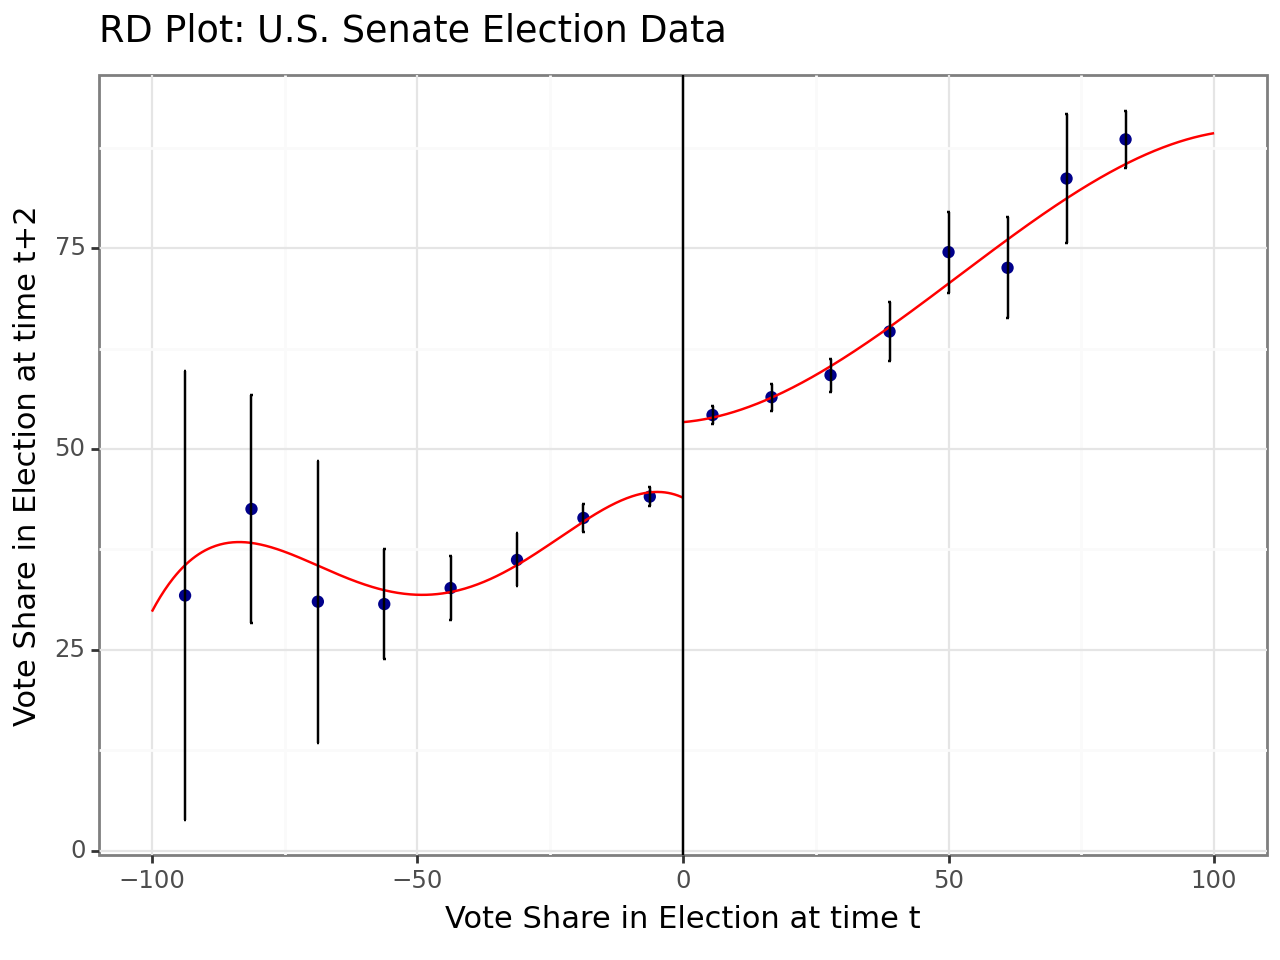


Call: rdplot
Number of Observations:                  1297
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Effective Obs          595        702
Bandwith poly. fit (h)         100.0      100.0
Number of bins scale               1          1
Bins Selected                      8          9
Average Bin Length              12.5     11.111
Median Bin Length               12.5     11.111
IMSE-optimal bins                8.0        9.0
Mimicking Variance bins         15.0       35.0

Relative to IMSE-optimal:
Implied scale                    1.0        1.0
WIMSE variance weight            0.5        0.5
WIMSE bias weight                0.5        0.5


In [87]:
### rdplot with 95% confidence intervals
rdplot(y=vote, x=margin, binselect="es", ci=95, 
         title="RD Plot: U.S. Senate Election Data", 
         y_label="Vote Share in Election at time t+2",
         x_label="Vote Share in Election at time t")

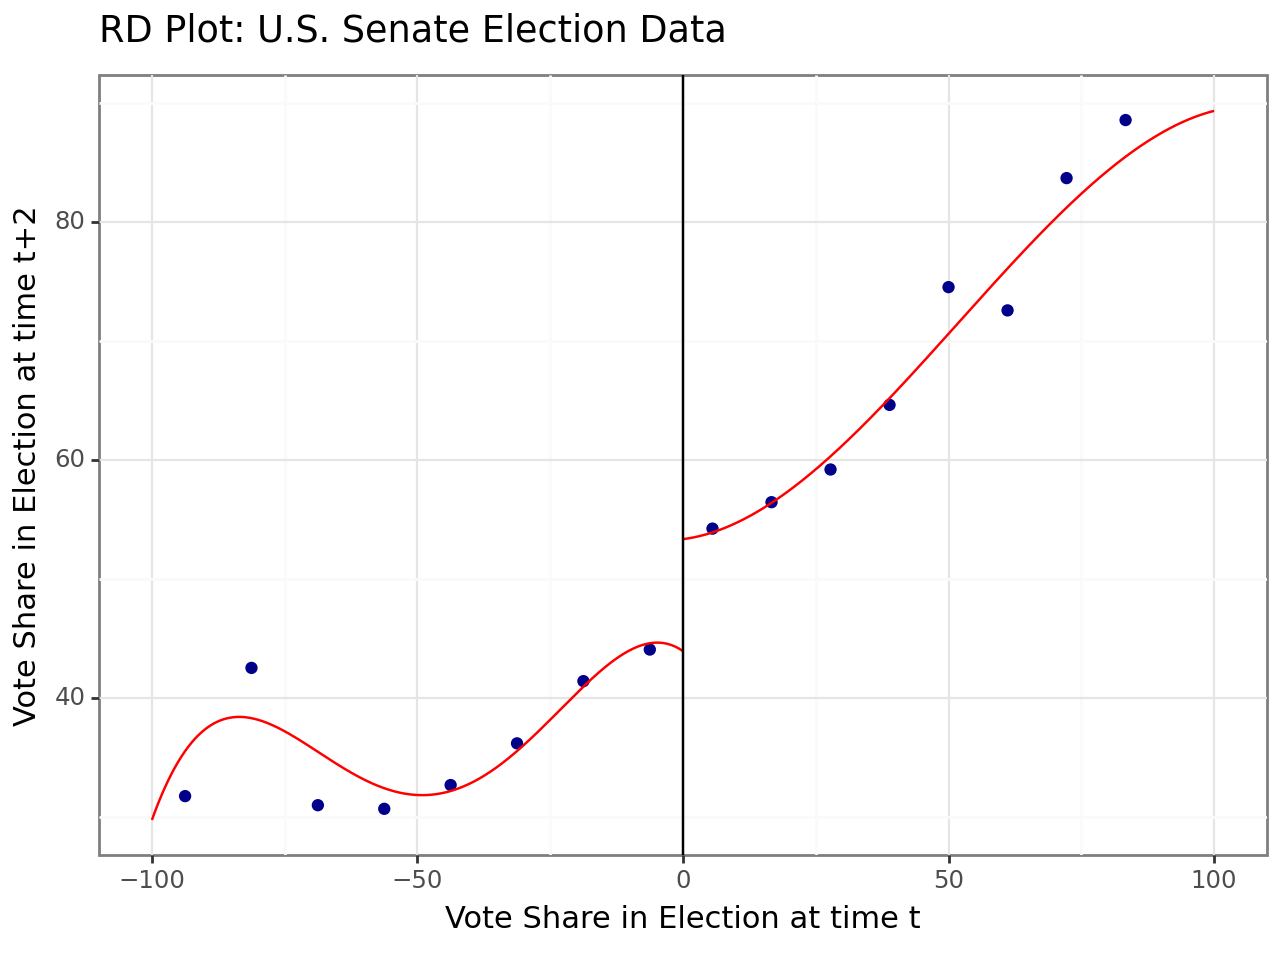


Call: rdplot
Number of Observations:                  1297
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Effective Obs          595        702
Bandwith poly. fit (h)         100.0      100.0
Number of bins scale               1          1
Bins Selected                      8          9
Average Bin Length              12.5     11.111
Median Bin Length               12.5     11.111
IMSE-optimal bins                8.0        9.0
Mimicking Variance bins         15.0       35.0

Relative to IMSE-optimal:
Implied scale                    1.0        1.0
WIMSE variance weight            0.5        0.5
WIMSE bias weight                0.5        0.5


In [36]:
### rdplot with MSE-optimal choice
rdplot(y=vote, x=margin, binselect="es", 
       title="RD Plot: U.S. Senate Election Data", 
       y_label="Vote Share in Election at time t+2",
       x_label="Vote Share in Election at time t")


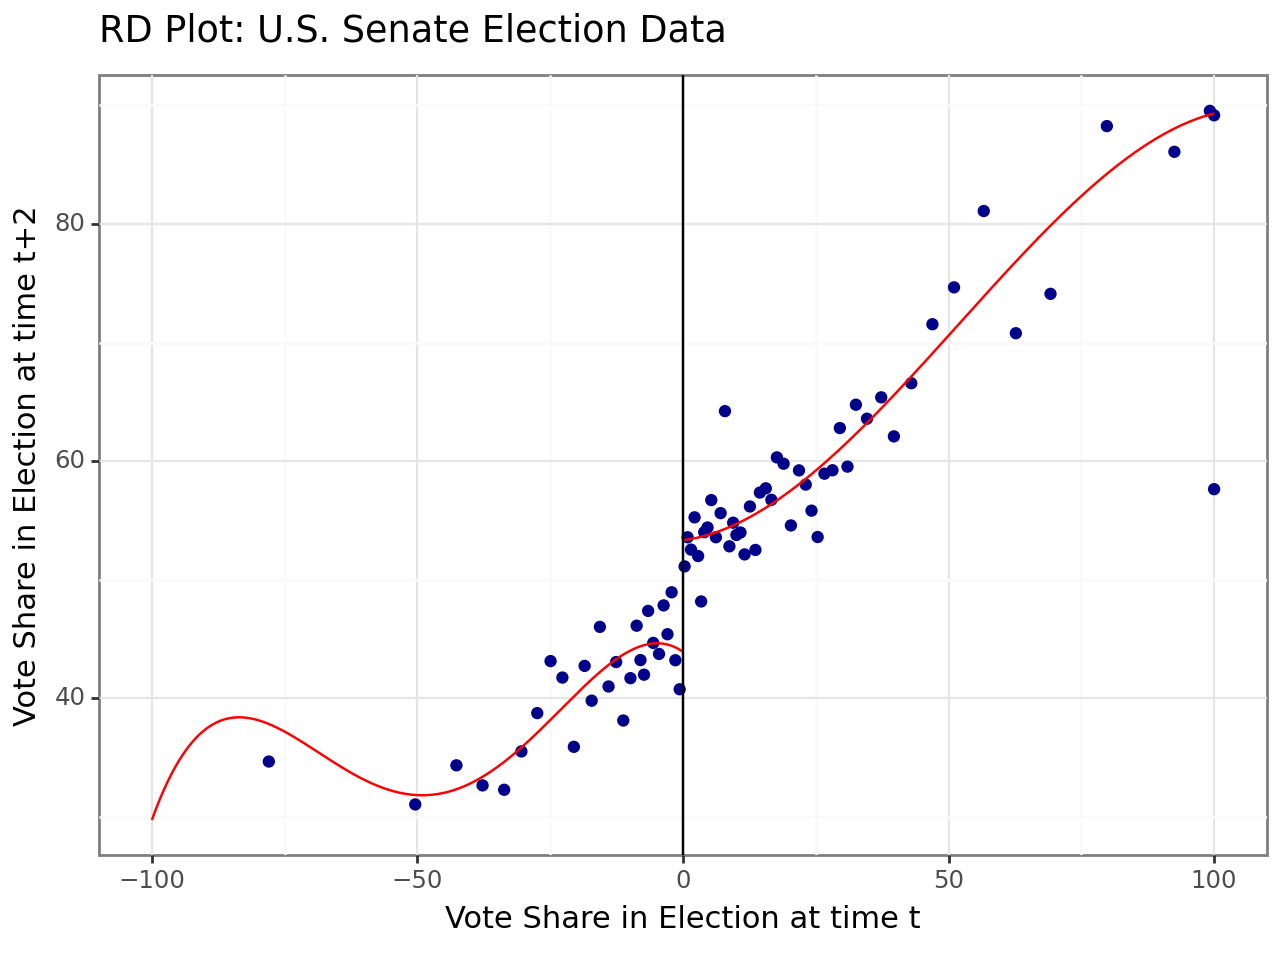


Call: rdplot
Number of Observations:                  1297
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Effective Obs          595        702
Bandwith poly. fit (h)         100.0      100.0
Number of bins scale               1          1
Bins Selected                     28         49
Average Bin Length             3.569      2.083
Median Bin Length              1.393       1.15
IMSE-optimal bins               21.0       16.0
Mimicking Variance bins         28.0       49.0

Relative to IMSE-optimal:
Implied scale                  1.333      3.062
WIMSE variance weight          0.297      0.034
WIMSE bias weight              0.703      0.966


In [37]:
### rdplot with QS partitioning and mimicking variance choice
rdplot(y=vote, x=margin, binselect="qsmv", 
       title="RD Plot: U.S. Senate Election Data", 
       y_label="Vote Share in Election at time t+2",
       x_label="Vote Share in Election at time t")


In [38]:
### rdrobust 
print(rdrobust(y=vote, x=margin))


Call: rdrobust
Number of Observations:                  1297
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Unique Obs.            595        665
Number of Effective Obs.         360        323
Bandwidth Estimation          17.754     17.754
Bandwidth Bias                28.028     28.028
rho (h/b)                      0.633      0.633

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       7.414    1.459    5.083   3.722e-07    [4.555, 10.273]
Robust                 -        -    4.311   1.625e-05    [4.094, 10.919]



In [39]:
### rdrobust with all estimates
print(rdrobust(y=vote, x=margin, all=True))


Call: rdrobust
Number of Observations:                  1297
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Unique Obs.            595        665
Number of Effective Obs.         360        323
Bandwidth Estimation          17.754     17.754
Bandwidth Bias                28.028     28.028
rho (h/b)                      0.633      0.633

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       7.414    1.459    5.083   3.722e-07    [4.555, 10.273]
Bias-Corrected     7.507    1.459    5.146   2.661e-07    [4.647, 10.366]
Robust             7.507    1

In [40]:
## rdrobust backward compatibility
print(rdrobust(y=vote, x=margin, h=16.79369, b=27.43745))


Call: rdrobust
Number of Observations:                  1297
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                   Manual
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Unique Obs.            595        665
Number of Effective Obs.         343        310
Bandwidth Estimation          16.794     16.794
Bandwidth Bias                27.437     27.437
rho (h/b)                      0.612      0.612

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       7.425    1.495    4.966   6.850e-07    [4.494, 10.356]
Robust                 -        -    4.267   1.977e-05     [4.07, 10.983]



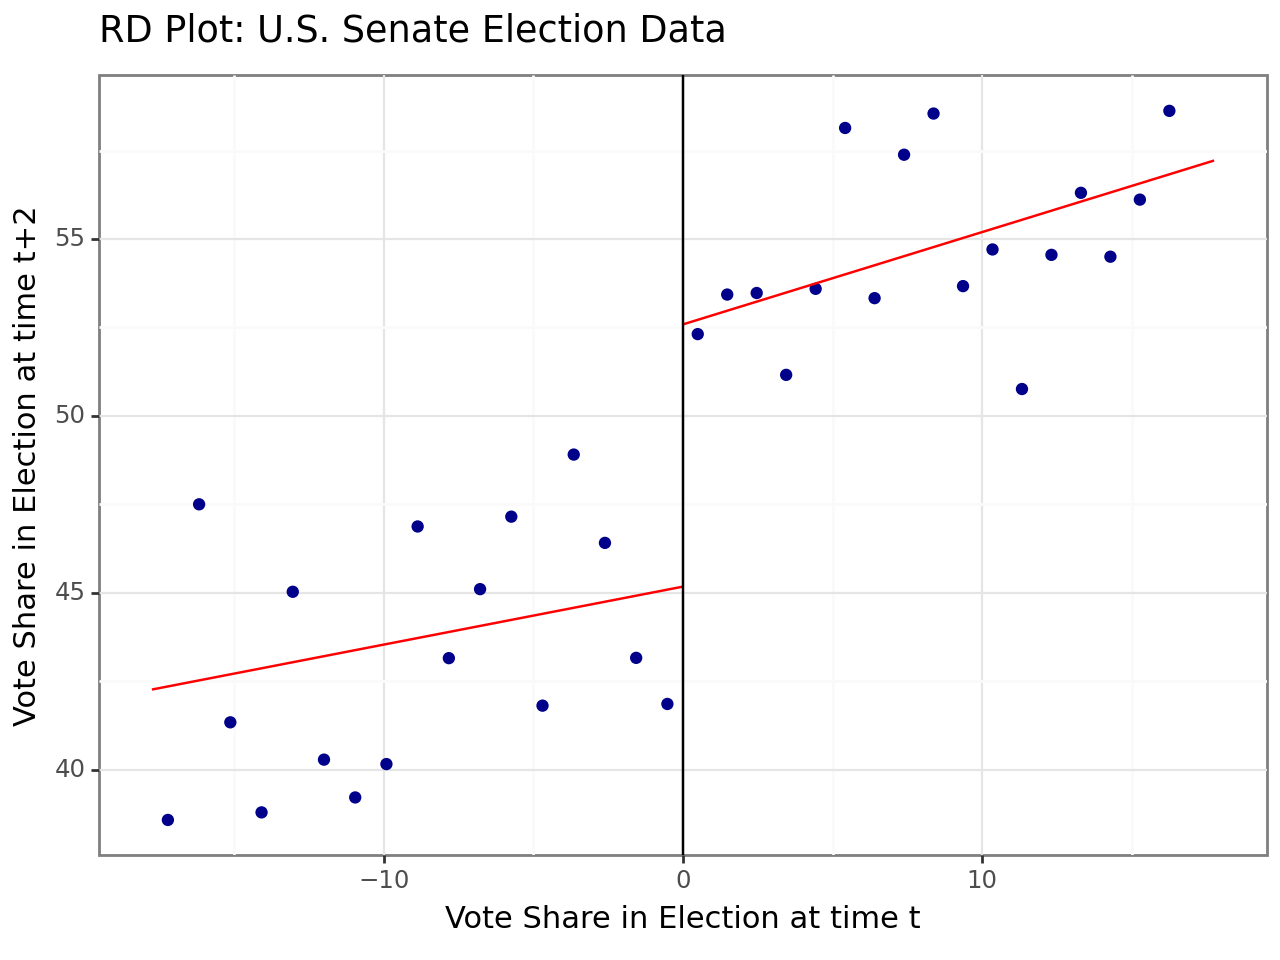


Call: rdplot
Number of Observations:                   683
Kernel:                            Triangular
Polynomial Order Est. (p):                  1

                                Left      Right
------------------------------------------------
Number of Observations           360        323
Number of Effective Obs          360        323
Bandwith poly. fit (h)        17.754     17.754
Number of bins scale               1          1
Bins Selected                     17         18
Average Bin Length             1.044      0.985
Median Bin Length              1.044      0.985
IMSE-optimal bins                8.0        6.0
Mimicking Variance bins         17.0       18.0

Relative to IMSE-optimal:
Implied scale                  2.125        3.0
WIMSE variance weight          0.094      0.036
WIMSE bias weight              0.906      0.964


In [41]:
## rdplot to show rdrobust estimate
est = rdrobust(y=vote, x=margin)
h_l, h_r = est.bws.loc['h', :].values
subset = ((-h_l<= margin) & (margin <= h_r)).values

rdplot(y=vote, x=margin, subset=subset,
       binselect="esmv", kernel="triangular", h=[h_l,h_r], p=1,
       title="RD Plot: U.S. Senate Election Data", 
       y_label="Vote Share in Election at time t+2",
       x_label="Vote Share in Election at time t")

In [42]:
## rdrobust with covariates within the same window (i.e., using same bandwidths)
est1 = rdrobust(y=vote, x=margin)
len1 = est1.ci.iloc[2,1] - est1.ci.iloc[2,0]
covs = rdrobust_senate[['class','termshouse','termssenate']]
b_l, b_r = est.bws.loc['b', :].values
est2 = rdrobust(y=vote, x=margin, covs=covs, 
                 h = [h_l,h_r], 
                 b = [b_l,b_r])
len2 = est2.ci.iloc[2,1] - est2.ci.iloc[2,0]
print("CI length change: " + str(round((len2/len1-1)*100,2)) + "%")


CI length change: -3.48%


In [43]:
## rdrobust with covariates with data-driven optimal bandwidths
est1 = rdrobust(y=vote, x=margin)
len1 = est1.ci.iloc[2,1] - est1.ci.iloc[2,0]
est2 = rdrobust(y=vote, x=margin, covs=covs)
len2 = est2.ci.iloc[2,1] - est2.ci.iloc[2,0]
print("CI length change: " + str(round((len2/len1-1)*100,2)) + "%")


CI length change: -4.46%


In [44]:
## rdrobust with useless covariate
est1 = rdrobust(y=vote, x=margin)
len1 = est1.ci.iloc[2,1] - est1.ci.iloc[2,0]
covs = rdrobust_senate['population']
est2 = rdrobust(y=vote, x=margin, covs=covs)
len2 = est2.ci.iloc[2,1] - est2.ci.iloc[2,0]
print("CI length change: " +  str(round((len2/len1-1)*100,2))+ "%")


CI length change: 0.28%


In [45]:
## rdrobust check covariate "balanced"
covs = rdrobust_senate[['class','termshouse','termssenate','population']]
balance = pd.DataFrame(columns = ["RD Effect", "Robust p-val"],
                       index = pd.Index(["class","termshouse", "termssenate", "population"]))
for z in covs.columns:
    est = rdrobust(y=covs[z], x=margin)
    balance.loc[z,"RD Effect"] = est.Estimate["tau.us"].values[0]
    balance.loc[z,"Robust p-val"] = est.pv.iloc[2].values[0]
    
print(balance)


                 RD Effect Robust p-val
class            -0.021338     0.896467
termshouse       -0.172574     0.561328
termssenate      -0.191764     0.900087
population  -318524.003747     0.633988


In [46]:
## rdrobust with clustering
state =rdrobust_senate.state.values
print(rdrobust(y=vote, x=margin, vce="nn", cluster=state))


Call: rdrobust
Number of Observations:                  1297
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Unique Obs.            595        665
Number of Effective Obs.         359        320
Bandwidth Estimation          17.577     17.577
Bandwidth Bias                27.095     27.095
rho (h/b)                      0.649      0.649

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional        7.42     1.52    4.881   1.056e-06      [4.441, 10.4]
Robust                 -        -    4.267   1.984e-05    [4.088, 11.035]



In [47]:
## rdrobust with clustering and covariates, and different bandwidth
covs = rdrobust_senate[['class','termshouse','termssenate']]
print(rdrobust(y=vote, x=margin, vce="nn", bwselect="msetwo", covs=covs, cluster=state))


Call: rdrobust
Number of Observations:                  1108
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                   msetwo
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           491        617
Number of Unique Obs.            491        580
Number of Effective Obs.         275        310
Bandwidth Estimation          14.692     20.985
Bandwidth Bias                 24.48     37.425
rho (h/b)                        0.6      0.561

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       6.806    1.369    4.973   6.589e-07     [4.124, 9.488]
Robust                 -        -     4.62   3.838e-06     [4.14, 10.242]



In [48]:
## rdbwselect with all estimates
print(rdbwselect(y=vote, x=margin, all=True))


Call: rdbwselect
Number of Observations:                  1297
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                      All
Var-Cov Estimator:                         NN

          h (left)  h (right)  b (left)  b (right)
mserd       17.754     17.754    28.028     28.028
msetwo      16.170     18.126    27.104     29.344
msesum      18.365     18.365    31.319     31.319
msecomb1    17.754     17.754    28.028     28.028
msecomb2    17.754     18.126    28.028     29.344
cerrd       12.407     12.407    28.028     28.028
certwo      11.299     12.667    27.104     29.344
cersum      12.834     12.834    31.319     31.319
cercomb1    12.407     12.407    28.028     28.028
cercomb2    12.407     12.667    28.028     29.344



In [49]:
## Other examples
print(rdrobust(y=vote, x=margin, kernel="uniform", vce="hc1", cluster=state))
print(rdrobust(y=vote, x=margin, bwselect="certwo", vce="hc3"))
print(rdrobust(y=vote, x=margin, h=(12,15), b=(18,20)))
print(rdrobust(y=vote, x=margin, covs=rdrobust_senate['class'], bwselect="cerrd", scaleregul=0, rho=1))
print(rdbwselect(y=vote, x=margin, kernel="uniform", vce="hc1", cluster=state, all=True))
print(rdbwselect(y=vote, x=margin, covs=rdrobust_senate['class'], bwselect="msetwo", vce="hc2", all=True))

Call: rdrobust
Number of Observations:                  1297
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                               Uniform
Bandwidth Selection:                    mserd
Var-Cov Estimator:                        HC1

                                Left      Right
------------------------------------------------
Number of Observations           595        702
Number of Unique Obs.            595        665
Number of Effective Obs.         296        258
Bandwidth Estimation          13.282     13.282
Bandwidth Bias                24.049     24.049
rho (h/b)                      0.552      0.552

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       7.046    1.676    4.204   2.625e-05    [3.761, 10.331]
Robust                 -        -    3.768   1.647e-04    [3.474, 11.007]

Call: rdrobust
Number of Obs

#### RD

É possivel utilizar o pacote RDPLOTS para visualizar os resultados do RDD.

In [70]:
## Impot rdrobust package
from rdrobust import rdplot
import pandas as pd
from plotnine import *

In [71]:
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/rdrobust_senate.dta")
x = df.margin
y = df.vote
c = 0

In [72]:
###########################################################################
# Generate input data for output plot
###########################################################################
plot1 = rdplot(y,x, ci=95, hide=True)
rdplot_mean_bin = plot1.vars_bins["rdplot_mean_bin"]
rdplot_mean_y   = plot1.vars_bins["rdplot_mean_y"]
y_hat           = plot1.vars_poly["rdplot_y"]
x_plot          = plot1.vars_poly["rdplot_x"]
rdplot_cil_bin  = plot1.vars_bins["rdplot_ci_l"]
rdplot_cir_bin  = plot1.vars_bins["rdplot_ci_r"]
rdplot_mean_bin = plot1.vars_bins["rdplot_mean_bin"]
y_hat_r = y_hat[x_plot>=c]
y_hat_l = y_hat[x_plot<c]
x_plot_r = x_plot[x_plot>=c]
x_plot_l = x_plot[x_plot<c]

col_lines = "red"
col_dots  = "darkblue"
type_dots = 20
title = "RD Plot"
x_label = "X axis"
y_label = "Y axis"
x_lim = (min(x),max(x))
y_lim = (min(y), max(y))

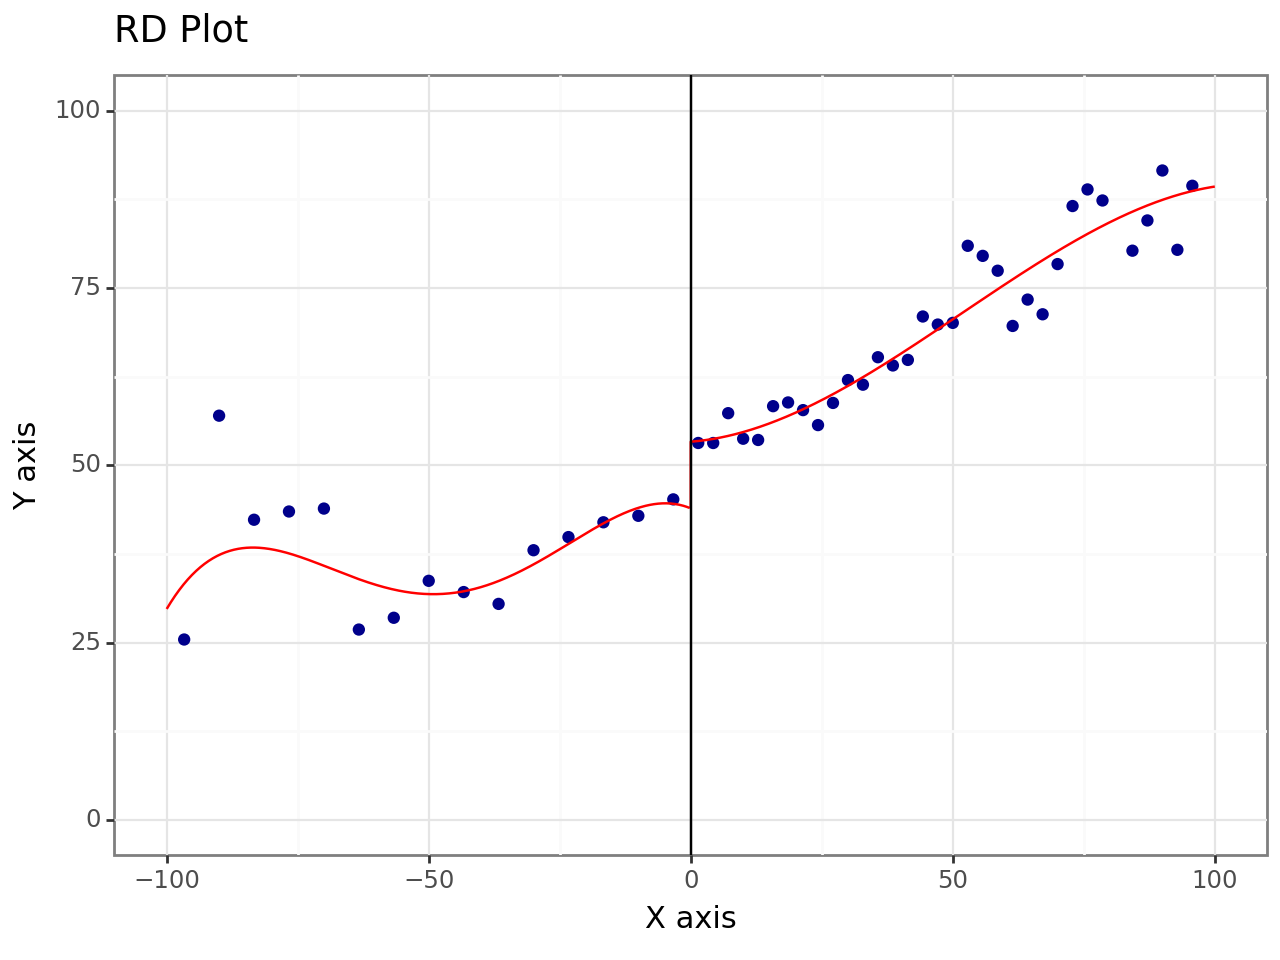

In [73]:
###########################################################################
# Generate rdplot using ggplot2
###########################################################################
temp_plot = (ggplot() + theme_bw() +

                    geom_point(aes(x=rdplot_mean_bin, y=rdplot_mean_y), color=col_dots, na_rm=True) +
                    geom_line(aes(x=x_plot_l, y=y_hat_l), color=col_lines, na_rm=True) +
                    geom_line(aes(x=x_plot_r, y=y_hat_r), color=col_lines, na_rm=True) +
                    labs(x = x_label, y = y_label) + ggtitle(title) +
                    labs(title = title, y = y_label, x = x_label) +
                    coord_cartesian(xlim = x_lim, ylim = y_lim) +
                    theme(legend_position = "None") +
                    geom_vline(xintercept = c, size = 0.5))
print(temp_plot)

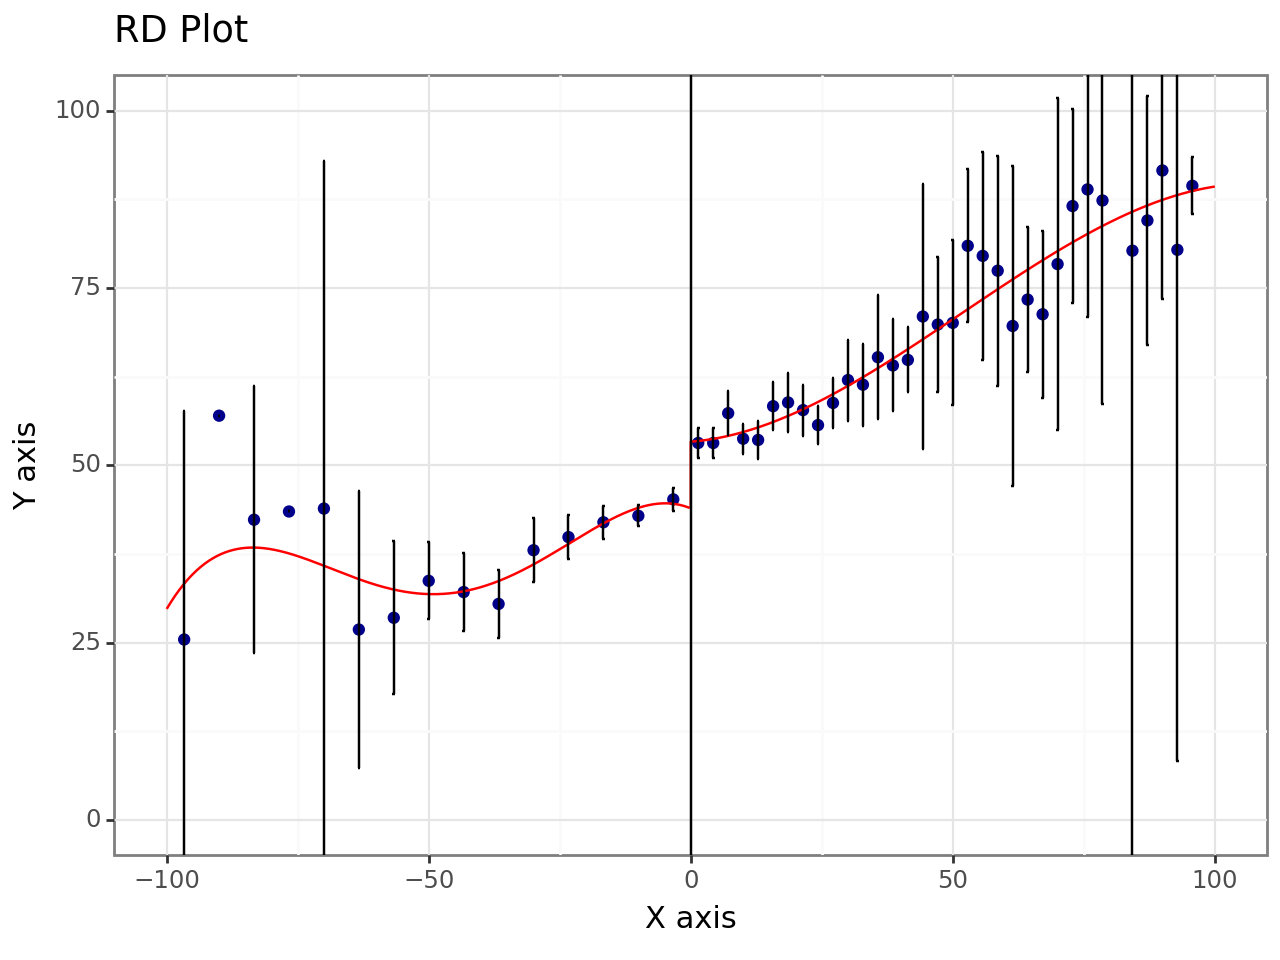

In [74]:
## Add confidence intervals 
temp_plot = temp_plot + geom_errorbar(aes(x = rdplot_mean_bin, ymin = rdplot_cil_bin, ymax = rdplot_cir_bin)) 
print(temp_plot)

#### RDLOCRAND: Local Randomization Methods for RD Designs

O RDD é um design quase experimental popular para inferência causal e avaliação de políticas. Sob a abordagem de randomização local, os designs RD podem ser interpretados como experimentos randomizados dentro de uma janela em torno do corte. O pacote rdlocrand fornece ferramentas para analisar designs RD sob randomização local: 

* rdrandinf: para executar testes de hipóteses usando inferência de randomização. 
* rdwinselect para selecionar uma janela em torno do corte na qual a randomização provavelmente se manterá. 
* rdsensitivity para avaliar a sensibilidade dos resultados a diferentes comprimentos de janela e hipóteses nulas. 
* rdrbounds para construir limites de Rosenbaum para sensibilidade a fatores de confusão não observados.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdlocrand import *

In [89]:
data = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/rdlocrand_senate.csv")

# Select predetermined covariates to be used for window selector

X = data[["presdemvoteshlag1", "population", "demvoteshlag1", "demvoteshlag2",
          "demwinprv1", "demwinprv2", "dopen", "dmidterm", "dpresdem"]]

X.loc[:,'population'] = X['population'].div(1000000)

# Assign names to the covariates

colnames_X = ["DemPres Vote", "Population", "DemSen Vote t-1", "DemSen Vote t-2",
              "DemSen Win t-1", "DemSen Win t-2", "Open", "Midterm", "DemPres"]

X.columns = colnames_X

# Running variable and outcome variable

R = data["demmv"].values
Y = data["demvoteshfor2"].values
D = 1*(R >= 0)

C:\Users\danie\AppData\Local\Temp\ipykernel_10636\2535804158.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.233    1.294    1.431    ... 1.273569 1.309731 1.360301]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


Mass points detected in running variable
You may use wmasspoints option for constructing windows at each mass point


Window selection for RD under local randomization


Number of obs     =           1390
Order of poly     =              0
Kernel type       =        uniform
Reps              =           1000
Testing method    =      rdrandinf
Balance test      =      diffmeans


Cutoff c =  0.000    Left of c    Right of c  
Number of obs          640          750      
1st percentile           7            7      
5th percentile          32           37      
10th percentile         64           75      
20th percentile        127          149      


      Window          p-value       Var. name    Bin.test      Obs<c     Obs>=c
  -0.5287   0.5287      0.204 DemSen Vote t-2       0.327         10         16


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rdlocrand\rdwinselect.py:245: UserWarning: obsstep included for backward compatibility only.
The use of wstep and wobs is recommended.


  -0.7330   0.7330      0.267            Open       0.200         15         24
  -0.9372   0.9372      0.130            Open       0.126         16         27
  -1.1414   1.1414      0.033            Open       0.161         20         31
  -1.3456   1.3456      0.221         Midterm       0.382         28         36
  -1.5499   1.5499      0.091         Midterm       0.728         35         39
  -1.7541   1.7541      0.074         Midterm       0.747         41         45
  -1.9583   1.9583      0.036         Midterm       0.602         43         49
  -2.1625   2.1625      0.082         Midterm       0.480         45         53
  -2.3668   2.3668      0.131            Open       0.637         53         59
Recommended window is [-0.733;0.733] with 39 observations (15 below, 24 above).



Mass points detected in running variable
You may use wmasspoints option for constructing windows at each mass point


Window selection for RD under local randomization


Number of obs     =        

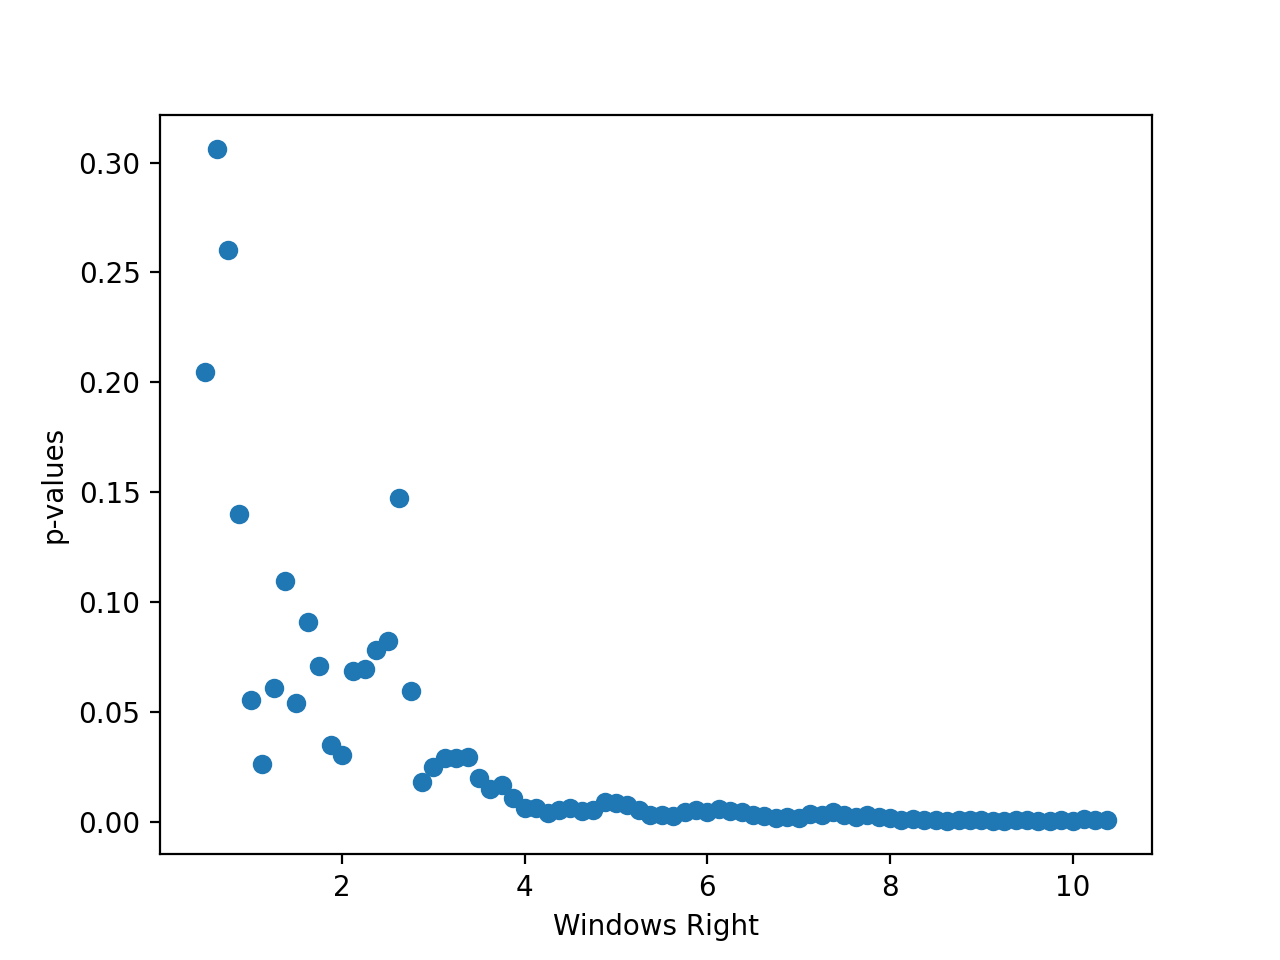

In [90]:
##############################################################################
# rdwinselect
##############################################################################

# Deprecated default options (Stata Journal 2016)
tmp = rdwinselect(R, X, obsstep=2)

# Window selection with default options
tmp = rdwinselect(R, X)

# Window selection with default options and symmetric windows
tmp = rdwinselect(R, X, wasymmetric=True)

# Window selection with specified window length and increments (replicate CFT)
tmp = rdwinselect(R, X, wmin=0.5, wstep=0.125, reps=10000)

# Window selection using large sample approximation and plotting p-values
tmp = rdwinselect(R, X, wmin=0.5, wstep=0.125, approx=True, nwindows = 80, quietly=True, plot=True)


In [81]:
###############################################################################
## rdrandinf
###############################################################################

# Randomization inference using recommended window
tmp = rdrandinf(Y, R, wl=-0.75, wr=0.75)

# Randomization inference using recommended window, all statistics
tmp = rdrandinf(Y, R, wl=-0.75, wr=0.75, statistic='all')

# Randomization inference using recommended window using rdwinselect
tmp = rdrandinf(Y, R, statistic='all', covariates=X, wmin=0.5, wstep=0.125, rdwreps=10000)

# Randomization inference using recommended window, linear adjustment
tmp = rdrandinf(Y, R, wl=-0.75, wr=0.75, statistic='all', p=1)

# Randomization inference under interference
tmp = rdrandinf(Y, R, wl=-0.75, wr=0.75, interfci=0.05)



Selected window = [-0.75;0.75] 


Running randomization-based test...
Randomization-based test complete.


Number of obs =             1297
Order of poly =                0
Kernel type =            uniform
Reps =                      1000
Window =             set by user
H0:     tau  =             0.000
Randomization =    fixed margins


Cutoff c =   0.000     Left of c  Right of c
Number of obs               595         702
Eff. number of obs           15          22
Mean of outcome          42.808      52.497
S.d. of outcome           7.042       7.742
Window                   -0.750       0.750

                                  Finite sample            Large sample         
                               ------------------  -----------------------------
Statistic                    T        P>|T|          P>|T|    Power vs d = 3.521
Diff. in means           9.689        0.000          0.000                 0.300

Selected window = [-0.75;0.75] 


Running randomization-based test..


Running sensitivity analysis...Sensitivity analysis complete.



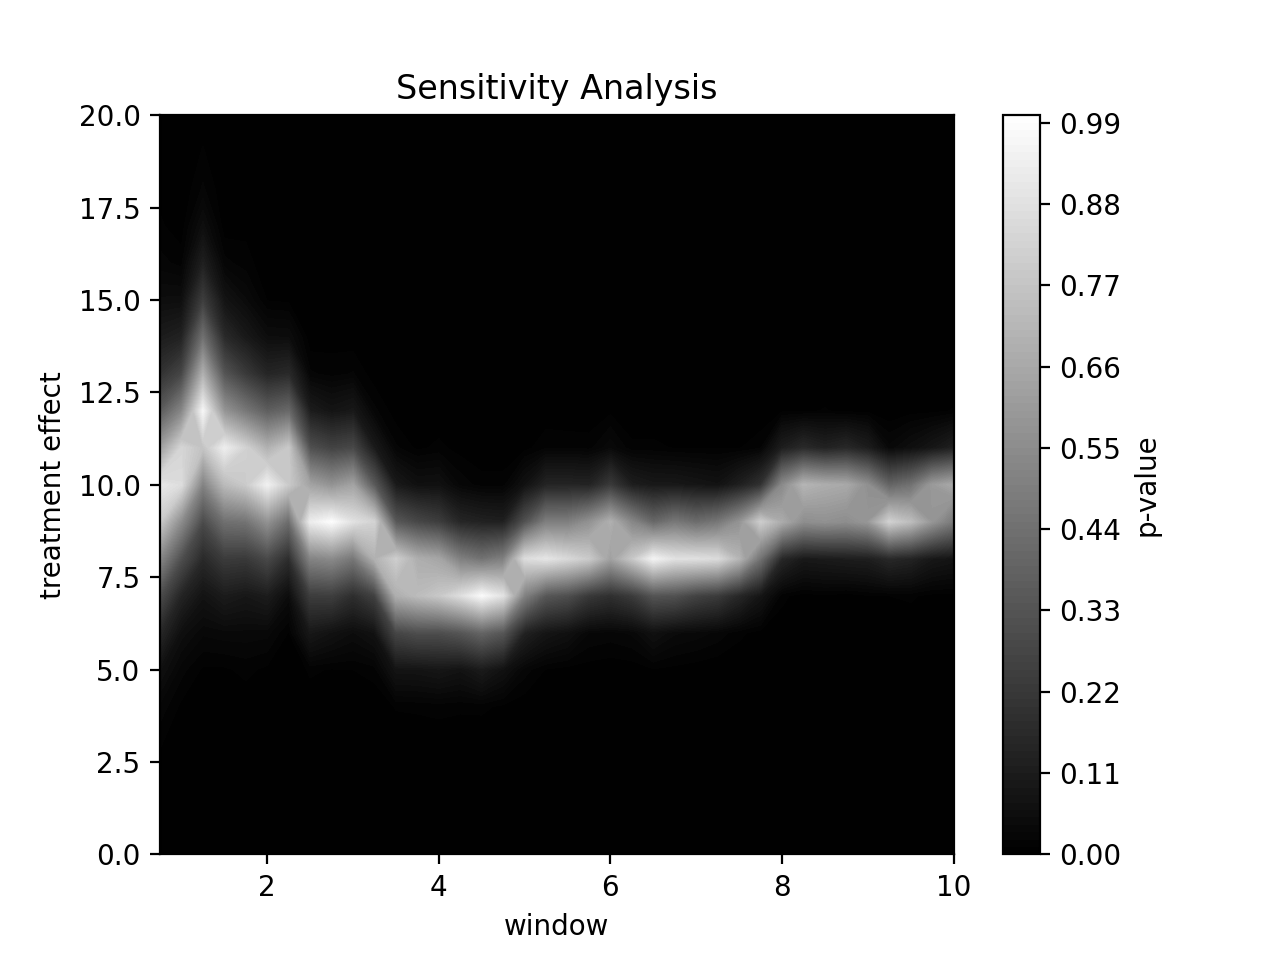

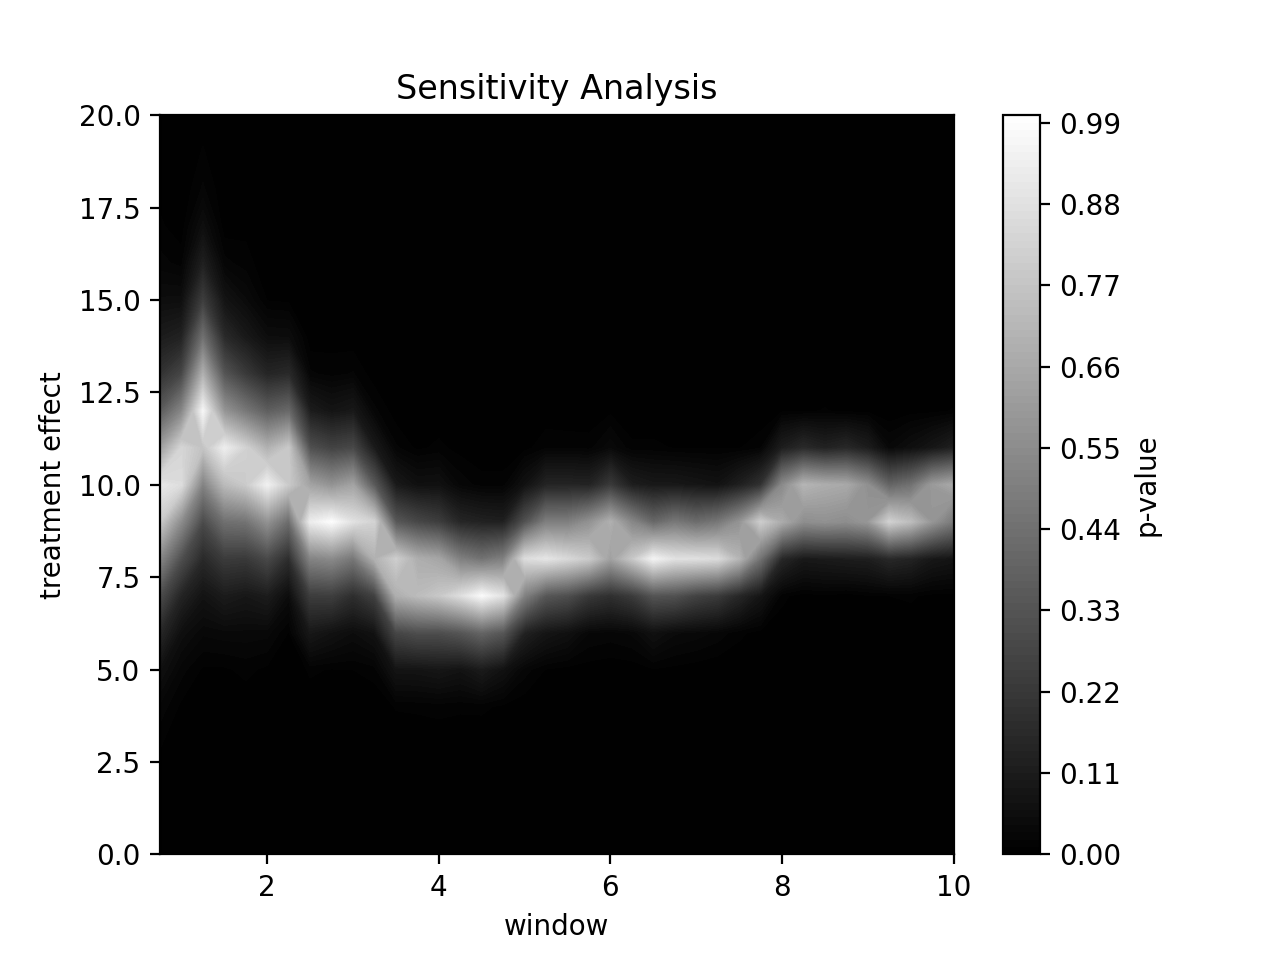


Running sensitivity analysis...Sensitivity analysis complete.



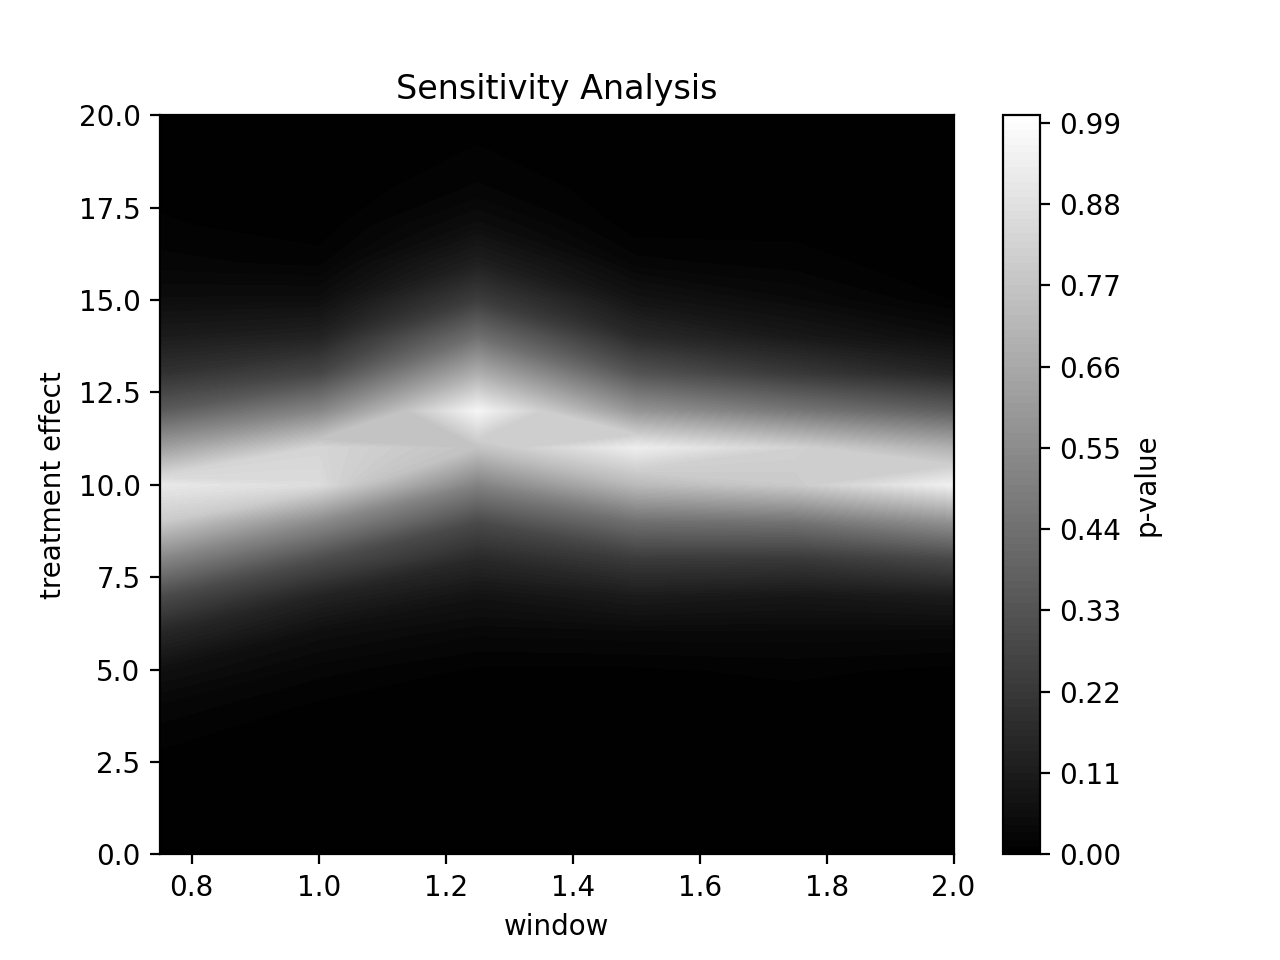

[[ 5 15]]

Selected window = [-0.75;0.75] 


Running randomization-based test...
Randomization-based test complete.

Running sensitivity analysis...Sensitivity analysis complete.



Number of obs =             1297
Order of poly =                0
Kernel type =            uniform
Reps =                      1000
Window =             set by user
H0:     tau  =             0.000
Randomization =    fixed margins


Cutoff c =   0.000     Left of c  Right of c
Number of obs               595         702
Eff. number of obs           15          22
Mean of outcome          42.808      52.497
S.d. of outcome           7.042       7.742
Window                   -0.750       0.750

                                  Finite sample            Large sample         
                               ------------------  -----------------------------
Statistic                    T        P>|T|          P>|T|    Power vs d = 3.521
Diff. in means           9.689        0.000          0.000                 0

In [82]:
###############################################################################
# rdsensitivity
###############################################################################

tmp = rdsensitivity(Y, R, wlist=np.arange(0.75, 10.25, 0.25), tlist=np.arange(0, 21, 1))

# Replicate contour plot
xaxis = tmp['wlist']
yaxis = tmp['tlist']
zvalues = tmp['results']
plt.contourf(xaxis, yaxis, zvalues, levels=np.arange(0, 1.01, 0.01), cmap='gray')
plt.xlabel('window')
plt.ylabel('treatment effect')
plt.colorbar(label='p-value')
plt.title('Sensitivity Analysis')
plt.show()

# Obtain 95 percent confidence interval for window [-0.75 ; 0.75]
tmp = rdsensitivity(Y, R, wlist=np.arange(0.75, 2.25, 0.25), tlist=np.arange(0, 21, 1), ci=[-0.75, 0.75])
confidence_interval = tmp['ci']
print(confidence_interval)

# rdsensitivity to calculate CI from within rdrandinf
tmp = rdrandinf(Y, R, wl=-0.75, wr=0.75, ci=[0.05] + list(np.arange(3, 21, 1)))


In [83]:
###############################################################################
# rdrbounds
###############################################################################

tmp = rdrbounds(Y, R, expgamma=[1.5, 2, 3], wlist=[0.5, 0.75, 1], reps=1000)
lower_bound = tmp['lower.bound']
print(lower_bound)
upper_bound = tmp['upper.bound']
print(upper_bound)

# Bernoulli and fixed margins p-values
tmp = rdrbounds(Y, R, expgamma=[1.5, 2, 3], wlist=[0.5, 0.75, 1], reps=1000, fmpval=True)
lower_bound = tmp['lower.bound']
print(lower_bound)
upper_bound = tmp['upper.bound']
print(upper_bound)



Calculating randomization p-value...

Bernoulli p-value (w = 0.5) = 0.006
Bernoulli p-value (w = 0.75) = 0.002
Bernoulli p-value (w = 1) = 0.0


Running sensitivity analysis...


Sensitivity analysis complete.
[[0.005 0.001 0.   ]
 [0.005 0.    0.   ]
 [0.005 0.001 0.   ]]
[[0.037 0.01  0.002]
 [0.095 0.045 0.026]
 [0.271 0.248 0.157]]

Calculating randomization p-value...

Bernoulli p-value (w = 0.5) = 0.006
Fixed margins p-value (w = 0.5) = 0.004
Bernoulli p-value (w = 0.75) = 0.002
Fixed margins p-value (w = 0.75) = 0.0
Bernoulli p-value (w = 1) = 0.0
Fixed margins p-value (w = 1) = 0.0


Running sensitivity analysis...


Sensitivity analysis complete.
[[0.005 0.001 0.   ]
 [0.005 0.    0.   ]
 [0.005 0.001 0.   ]]
[[0.037 0.01  0.002]
 [0.095 0.045 0.026]
 [0.271 0.248 0.157]]

Selected window = [-0.75;0.75] 


Running randomization-based test...
Randomization-based test complete.


Number of obs =             1297
Order of poly =                1
Kernel type =            uniform


In [ ]:
###############################################################################
# rdrandinf with eval options
###############################################################################

ii = (R >= -0.75) & (R <= 0.75) & (~np.isnan(Y)) & (~np.isnan(R))
m0 = np.mean(R[ii & (D == 0)], axis=0)
m1 = np.mean(R[ii & (D == 1)], axis=0)
tmp = rdrandinf(Y, R, wl=-0.75, wr=0.75, p=1, evall=m0, evalr=m1)

### Outros Pacotes

* O pacote rdmulti fornece implementação em Python, R e Stata de gráficos de RD, métodos de estimativa, inferência e extrapolação para projetos de RD com múltiplos pontos de corte e múltiplas pontuações.
  * `pip install rdmulti`
  * replicação: https://github.com/rdpackages/rdmulti/blob/master/python/rdmulti_illustration.py 

* O pacote rdpower fornece implementações em Python, R e Stata de cálculos de potência, tamanho de amostra e efeitos mínimos detectáveis ​​usando métodos robustos de inferência polinomial local com correção de viés.
  * `pip install rdpower`
  * replicação: https://github.com/rdpackages/rdpower/blob/master/python/rdpower_illustration.py
